{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


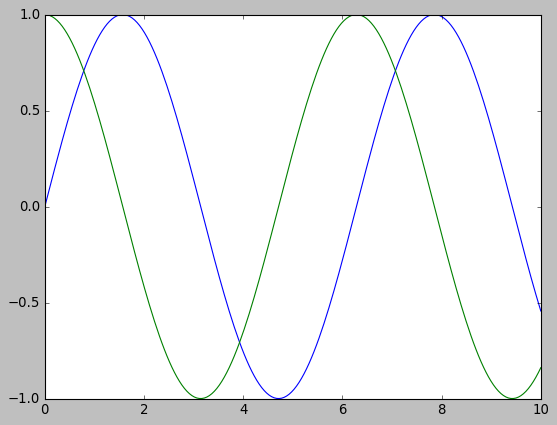

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# apre una finestra con i plot
%matplotlib inline

#styles for figures
plt.style.use('classic')
x = np.linspace(0,10,200)

fig=plt.figure() # ho il plot salvato in 'fig'

plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

fig.savefig('my_plot.png')
print(fig.canvas.get_supported_filetypes())
plt.show() # dovrebbe essere solo 1 e alla fine!

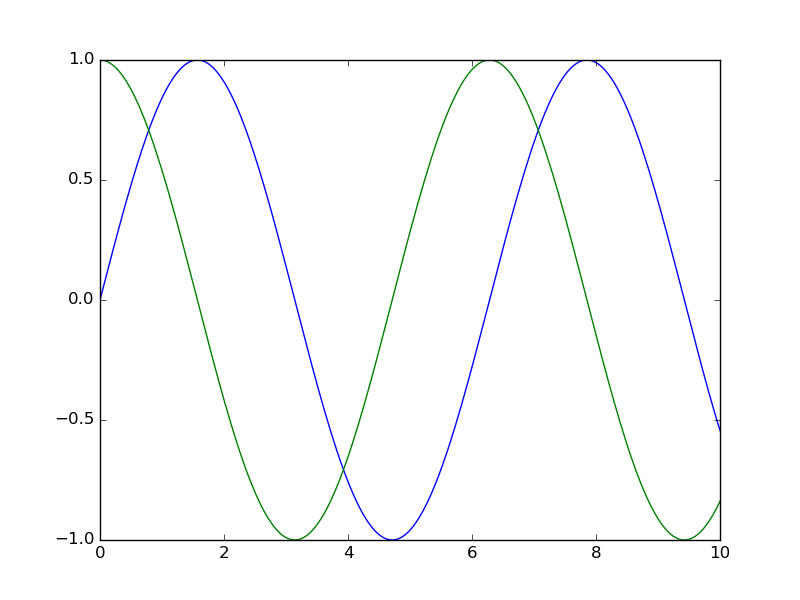

In [11]:
from IPython.display import Image
Image('my_plot.png')

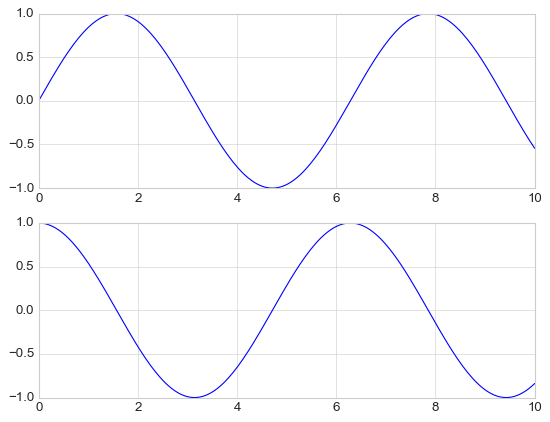

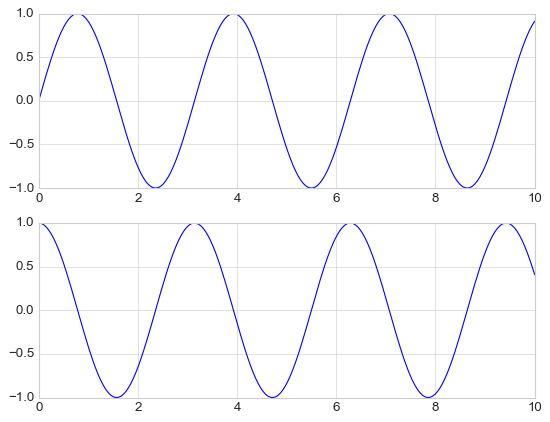

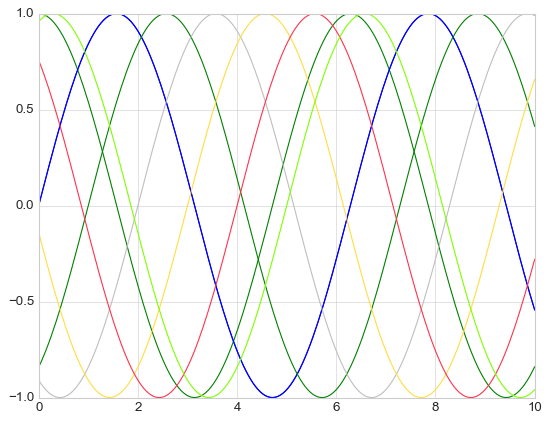

In [28]:
plt.figure()
plt.subplot(2,1,1) #row, col, panel_number 
plt.plot(x,np.sin(x))
plt.subplot(2,1,2)
plt.plot(x,np.cos(x))

#alternative method

fig,ax=plt.subplots(2)
ax[0].plot(x,np.sin(x*2))
ax[1].plot(x,np.cos(x*2))

# simple line plots
plt.style.use('seaborn-whitegrid')
fig=plt.figure() #container that contains all the object representing axes,graphics,text and label
ax=plt.axes() # bounding box containing the plot

ax.plot(x,np.sin(x))
ax.plot(x,np.cos(x))

plt.plot(x,np.sin(x-0),color='blue') # color by name
plt.plot(x,np.sin(x-1),color='g') # color code rgbcmyk
plt.plot(x,np.sin(x-2),color='0.75') #rayscale 0-1
plt.plot(x,np.sin(x-3),color='#FFDD44')# hex code
plt.plot(x,np.sin(x-4),color=(1.0,0.2,0.3)) # rgb
plt.plot(x,np.sin(x-5),color='chartreuse') # html supported color




(0.0, 10.0, -5.0, 20.0)

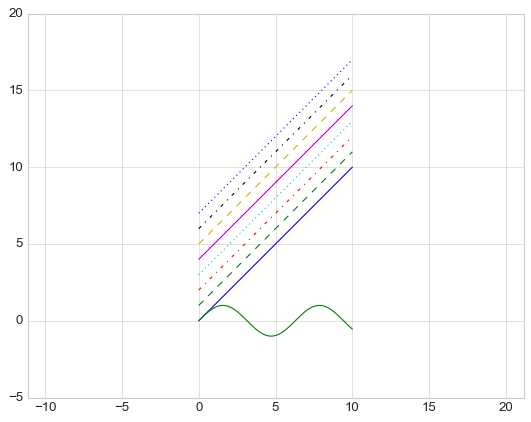

In [32]:
#line style

plt.plot(x,x+0,linestyle='solid')
plt.plot(x,x+1,linestyle='dashed')
plt.plot(x,x+2,linestyle='dashdot')
plt.plot(x,x+3,linestyle='dotted')

plt.plot(x,x+4,linestyle='-')
plt.plot(x,x+5,linestyle='--')
plt.plot(x,x+6,linestyle='-.')
plt.plot(x,x+7,linestyle=':')

#too verbose?
# plt.plot(x,x+4,'-g')
plt.plot(x,np.sin(x))
plt.xlim(-1,11)
plt.ylim(-1.5,1.5)
# OR
plt.axis([-1,11,-1.5,1.5])
plt.axis('tight')
plt.axis('equal')


<ipython-input-40-6d1a832c0d36>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


[(-2.0, 2.0),
 Text(0, 0.5, 'sin(x)'),
 (0.0, 10.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'A simple plot')]

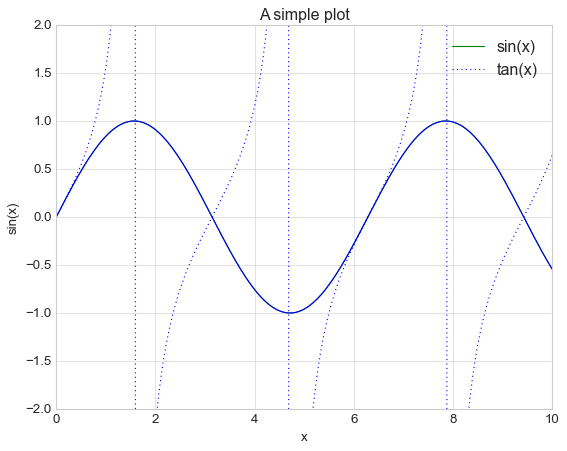

In [40]:
plt.plot(x,np.sin(x),'-g',label='sin(x)')
plt.plot(x,np.tan(x),':b',label='tan(x)')

plt.title("Sine curve")

plt.xlabel("x")
plt.ylabel("sin(x)")
plt.axis('tight')
plt.legend()

ax=plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10),ylim=(-2,2),xlabel='x',ylabel='sin(x)',title='A simple plot')


[0.44712538 0.84640867 0.69947928 0.29743695 0.81379782]


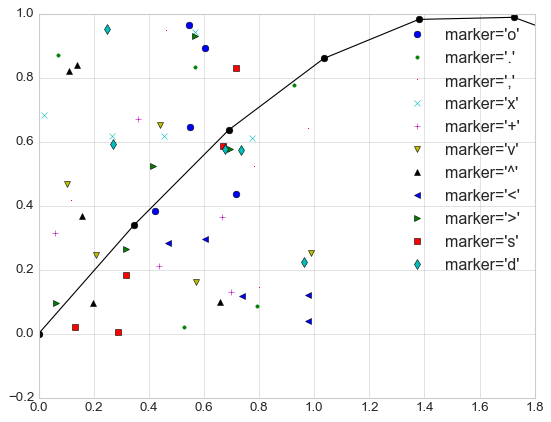

In [46]:
x=np.linspace(0,10,30)
y=np.sin(x)
plt.xlim(0,1.8)
plt.ylim(-0.2,1)
plt.plot(x,y,'-ok',color='black')
rng=np.random.RandomState(0)
for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5),rng.rand(5),marker,label="marker='{0}'".format(marker))

plt.legend(numpoints=1)
print(rng.rand(5))

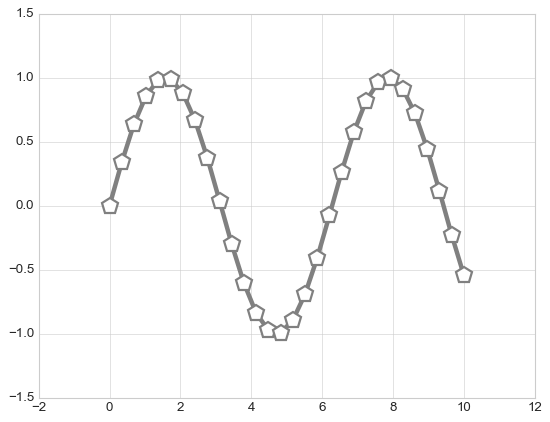

In [50]:
plt.plot(x,y,'-p', color='gray',
         markersize=15,linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
#plt.ylim(-1.2,1.2)



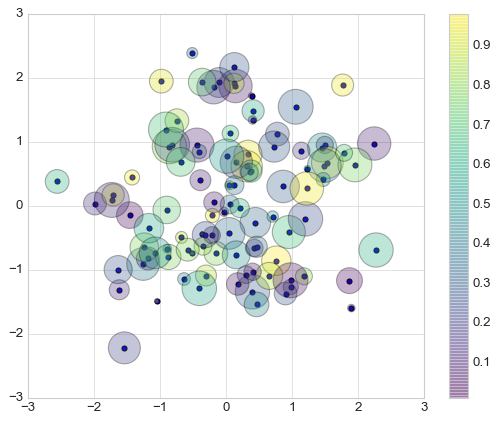

In [54]:
plt.scatter(x,y,marker='o')

rng=np.random.RandomState(0)
x=rng.randn(100)
y=rng.randn(100)
colors=rng.rand(100)
sizes=1000*rng.rand(100)
plt.scatter(x,y,c=colors,s=sizes,alpha=0.3,cmap='viridis')
plt.colorbar()
#print(rng.rand(100))



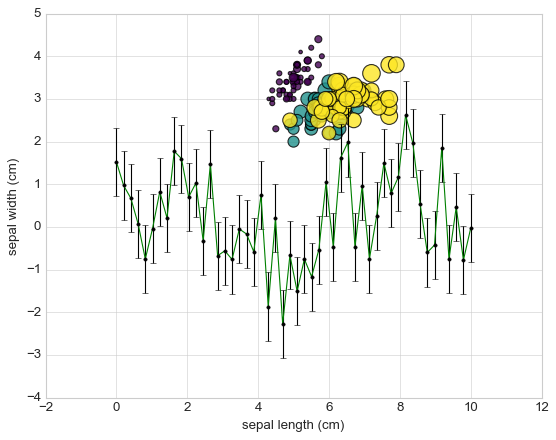

In [59]:
from sklearn.datasets import load_iris
iris=load_iris()
features=iris.data.T

plt.scatter(features[0],features[1],alpha=0.8,
           s=100*features[3],c=iris.target,cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

#efficency
#plot vs scatter, plot is more efficenty better for large dataset
x=np.linspace(0,10,50)
dy=0.8
y=np.sin(x)+dy*np.random.randn(50)
plt.errorbar(x,y,yerr=dy,fmt='.k') #yerr commetto un errore di al piu 0.8?
plt.plot(x,y,'-g')


<ErrorbarContainer object of 3 artists>

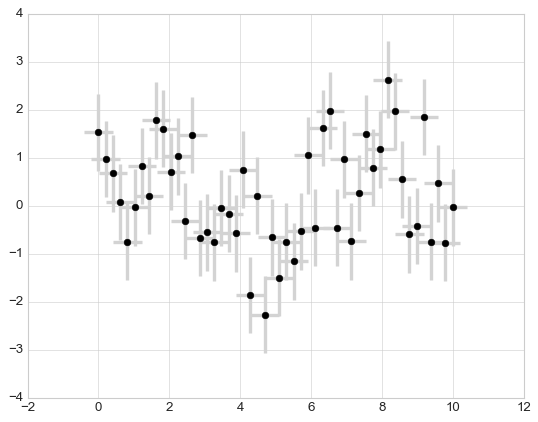

In [62]:
plt.errorbar(x,y,yerr=dy,fmt='o',color='black', ecolor='lightgray',elinewidth=3,capsize=0,xerr=0.4)

In [68]:
from sklearn.gaussian_process import GaussianProcess

#import sklearn?

model=lambda x: x*np.sin(x)
xdata=np.array([1,3,5,6,8])
ydata=model(xdata)

gp=GaussianProcess(corr='cubic',theta0=1e-2,thetaL=1e-4,thetaU=1E-1
                    ,random_start=100)

gp.fit(xdata[:,np.newaxis],ydata)

xfit=np.linspace(0,10,1000)
yfit,MSE=gp.predict(xfit[:,np.newaxis],eval_MSE=True)
dyfit=2*np.sqrt(MSE)

plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')
plt.fill_between(xfit,yfit-dyfit,yfit+dyfit,color='gray',alpha=0.2)
plt.xlim(0,10)

TypeError: __init__() got an unexpected keyword argument 'corr'

<ipython-input-83-7abe637ee6ce>:19: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(aspect='image')


(0.0, 5.0, 0.0, 5.0)

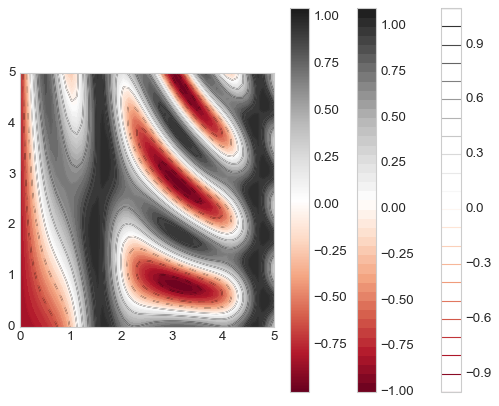

In [83]:
#contour plot

def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x=np.linspace(0,5,50)
y=np.linspace(0,5,50)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)

plt.contour(X,Y,Z,colors="black")
plt.contour(X,Y,Z,20,cmap="RdGy")
plt.colorbar()
plt.contourf(X,Y,Z,50,cmap='RdGy')
plt.colorbar()


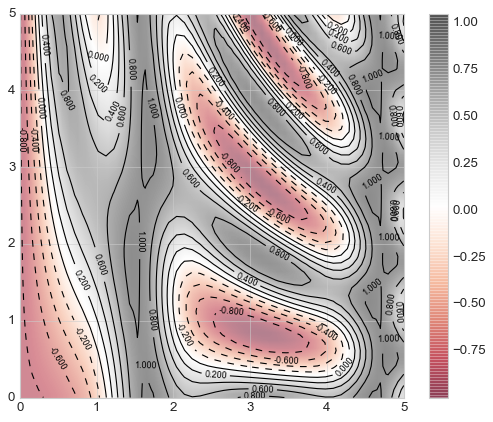

In [89]:

#plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
#plt.colorbar()
#plt.axis(aspect='image')

contours=plt.contour(X,Y,Z,10,colors="black")

plt.clabel(contours,inline=True,fontsize=8)
plt.imshow(Z,extent=[0,5,0,5],origin="lower",cmap="RdGy",alpha=0.5)
plt.colorbar()

[  6 108 412 399  75]


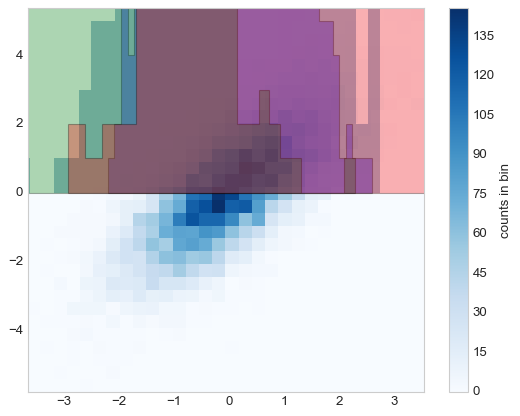

In [99]:
data=np.random.randn(1000)
plt.hist(data, bins=30,alpha=0.5,histtype='stepfilled',color='steelblue',edgecolor='none')

x1=np.random.normal(0,0.8,1000) ## (media,varianza,num)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)
kwargs=dict(histtype='stepfilled',alpha=0.3,bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)

counts,bin_edges=np.histogram(data,bins=5)
print(counts) # frequency



[-3.86946505 -3.61511415 -3.36076325 -3.10641235 -2.85206144 -2.59771054
 -2.34335964 -2.08900874 -1.83465783 -1.58030693 -1.32595603 -1.07160513
 -0.81725422 -0.56290332 -0.30855242 -0.05420152  0.20014939  0.45450029
  0.70885119  0.96320209  1.217553    1.4719039   1.7262548   1.9806057
  2.23495661  2.48930751  2.74365841  2.99800931  3.25236022  3.50671112
  3.76106202]


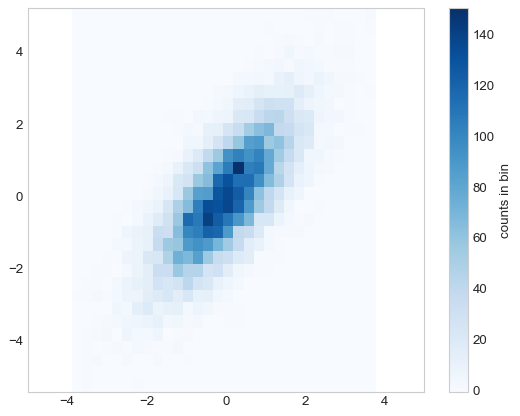

In [105]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,10000).T
plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label('counts in bin')
plt.xlim(-5,5)
counts,xedges,yedges=np.histogram2d(x,y,bins=30)


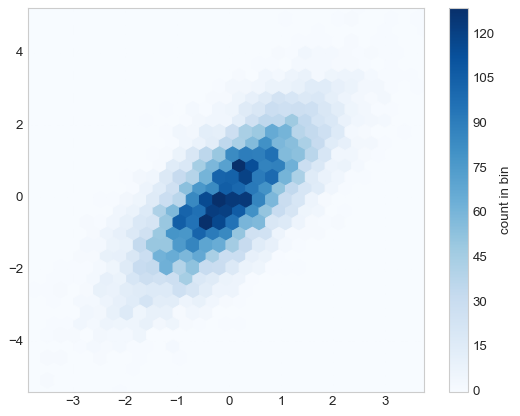

In [106]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb=plt.colorbar(label='count in bin')


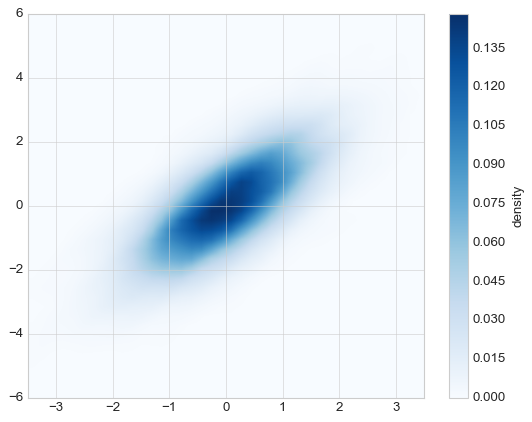

In [110]:
from scipy.stats import gaussian_kde

data=np.vstack([x,y])
kde=gaussian_kde(data)

xgrid=np.linspace(-3.5,3.5,40)
ygrid=np.linspace(-6,6,40)
Xgrid,Ygrid=np.meshgrid(xgrid,ygrid)
Z=kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),origin='lower',aspect='auto',extent=[-3.5,3.5,-6,6],cmap="Blues")

cb=plt.colorbar()
cb.set_label("density")

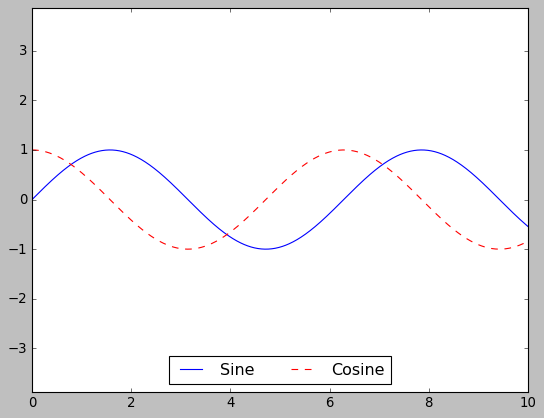

In [116]:
plt.style.use('classic')
x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
ax.axis('equal')
leg=ax.legend(loc='lower center',ncol=2)

None


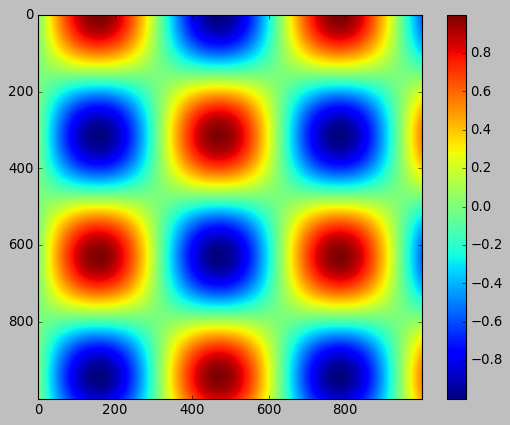

In [118]:
x=np.linspace(0,10,1000)
I=np.sin(x)*np.cos(x[:,np.newaxis])
plt.imshow(I)
plt.colorbar()
print(np.newaxis)

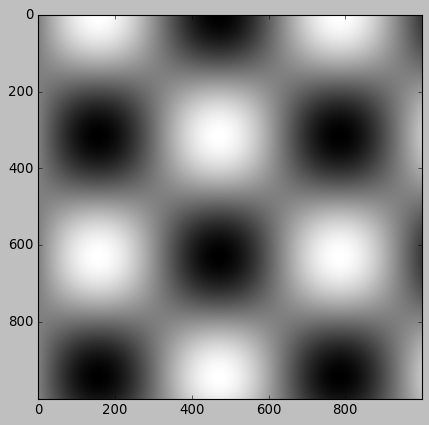

In [119]:
plt.imshow(I,cmap='gray')

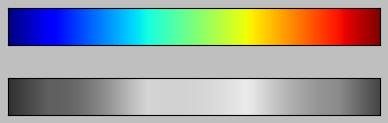

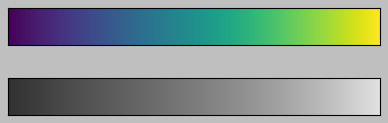

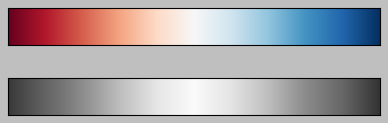

In [128]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    
    cmap=plt.cm.get_cmap(cmap)
    colors=cmap(np.arange(cmap.N))
    RGB_weight=[0.299,0.587,0.144]
    luminance=np.sqrt(np.dot(colors[:,:3]**2,RGB_weight))
    colors[:,:3]=luminance[:,np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name+"_gray_",colors,cmap.N)

def view_colormap(cmap):
    
    cmap=plt.cm.get_cmap(cmap)
    colors=cmap(np.arange(cmap.N))
    
    cmap=grayscale_cmap(cmap)
    grayscale=cmap(np.arange(cmap.N))
    
    fig,ax=plt.subplots(2,figsize=(6,2),subplot_kw=dict(xticks=[],yticks=[]))
    ax[0].imshow([colors],extent=[0,10,0,1])
    ax[1].imshow([grayscale],extent=[0,10,0,1])
    
view_colormap('jet')
view_colormap('viridis')
#view_colormap('cubehelix')
view_colormap('RdBu')


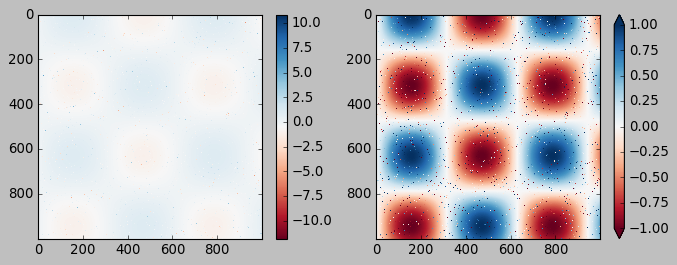

In [130]:
speckles=(np.random.random(I.shape)<0.01)
I[speckles]=np.random.normal(0,3,np.count_nonzero(speckles))

plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.imshow(I,cmap='RdBu')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(I,cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1,1)

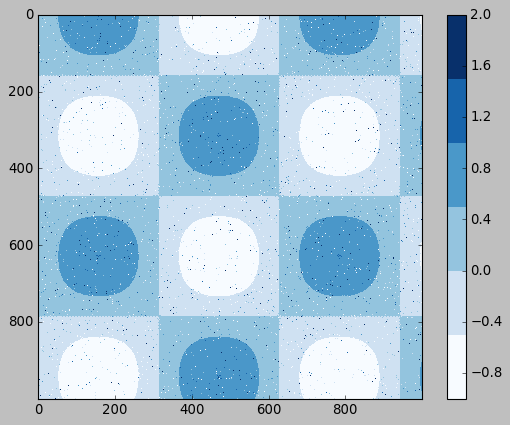

In [132]:
plt.imshow(I,cmap=plt.cm.get_cmap('Blues',6))
plt.colorbar()
plt.clim(-1,2)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


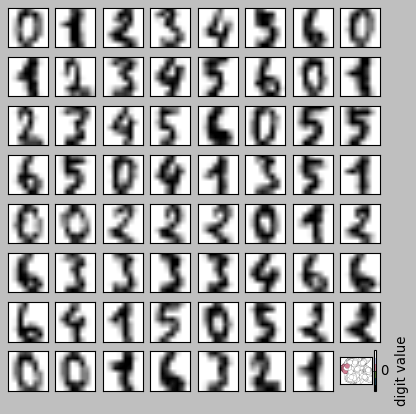

In [139]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=7) # fino a digit 5

fig,ax=plt.subplots(8,8,figsize=(6,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap='binary')
    axi.set(xticks=[],yticks=[])
   

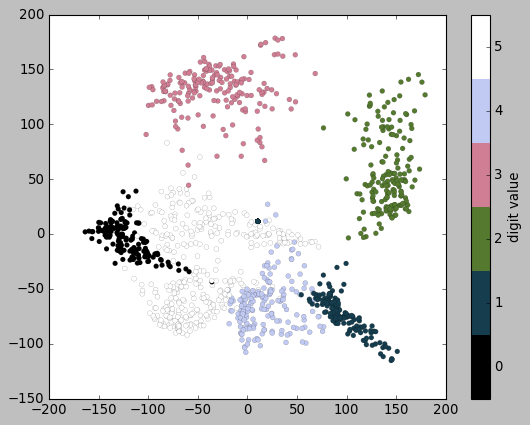

In [141]:
 
from sklearn.manifold import Isomap

iso=Isomap(n_components=2)
projection=iso.fit_transform(digits.data)

plt.scatter(projection[:,0],projection[:,1],lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix',6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5,5.5)
    

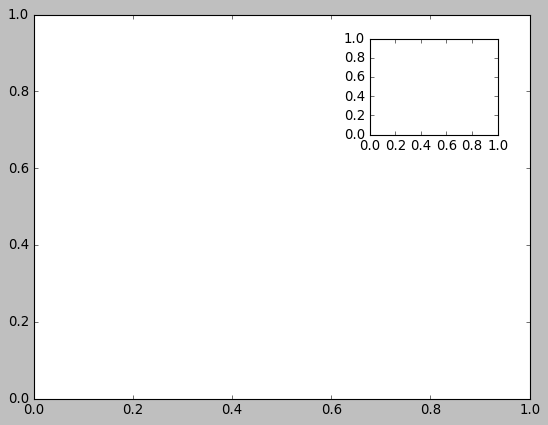

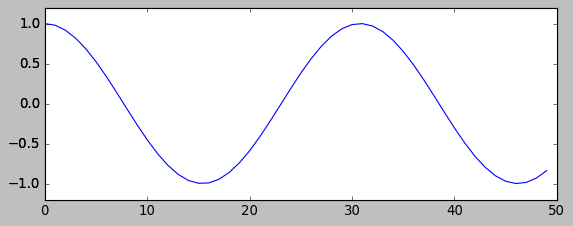

In [142]:
ax1=plt.axes()
ax2=plt.axes([0.65,0.65,0.2,0.2])
#subplot
fig=plt.figure()
ax1=fig.add_axes([0.1,0.5,0.8,0.4],
                xticklabels=[],ylim=(-1.2,1.2))
ax2=fig.add_axes([0.1,0.5,0.8,0.4],ylim=(-1.2,1.2))

x=np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))



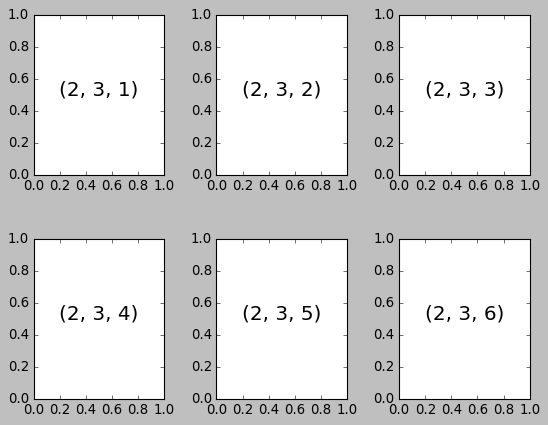

In [145]:
fig=plt.figure()
fig.subplots_adjust(hspace=.4,wspace=.4)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
            fontsize=18,ha='center')
    


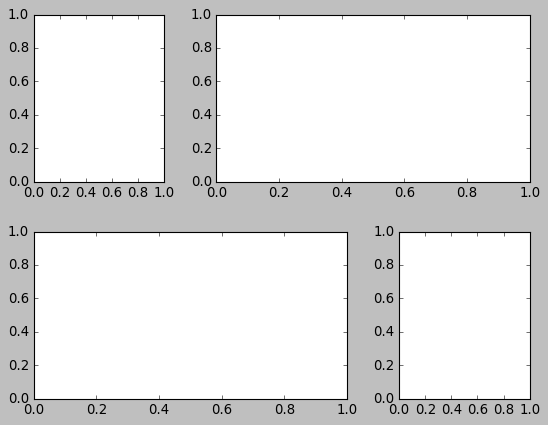

In [146]:
grid=plt.GridSpec(2,3,wspace=.4,hspace=.3)

plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2])


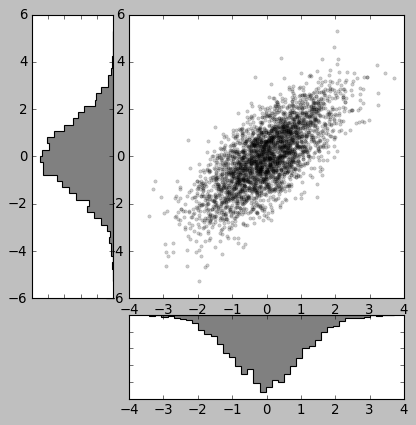

In [152]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,3000).T

fig=plt.figure(figsize=(6,6))
grid=plt.GridSpec(4,4,hspace=0.2,wspace=.2)
main_ax=fig.add_subplot(grid[:-1, 1:])
y_hist=fig.add_subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist=fig.add_subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)

main_ax.plot(x,y,'ok',markersize=3,alpha=.2)
x_hist.hist(x,40,histtype='stepfilled',orientation='vertical',color='gray')
x_hist.invert_yaxis()
y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis()


Text(2, -6, 'local minimum')

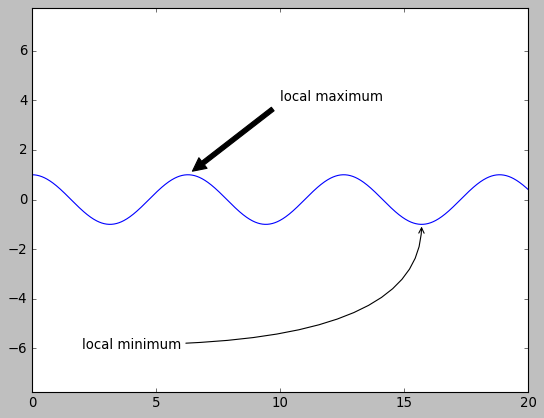

In [155]:
fig,ax=plt.subplots()

x=np.linspace(0,20,1000)
ax.plot(x,np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28,1),xytext=(10,4),
           arrowprops=dict(facecolor='black',shrink=0.05))
ax.annotate('local minimum', xy=(5*np.pi,-1),xytext=(2,-6),
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))


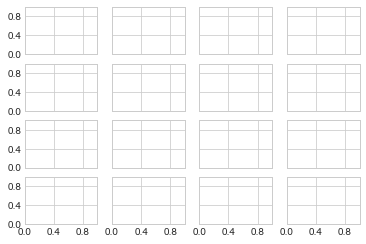

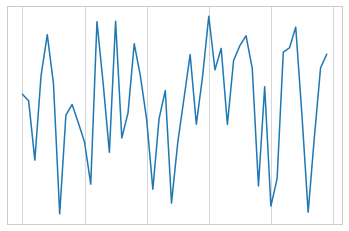

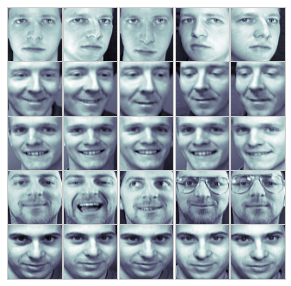

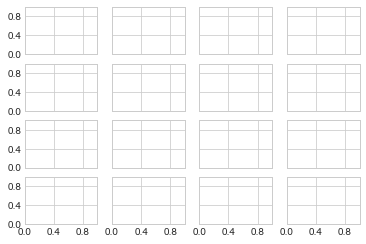

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

ax = plt.axes(xscale='log', yscale='log')
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

ax= plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())


fig,ax=plt.subplots(5,5, figsize=(5,5))
fig.subplots_adjust(hspace=0,wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces=fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(faces[20*i+j],cmap="bone")

        
fig,ax=plt.subplots(4,4,sharex=True,sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig


$\pi/$


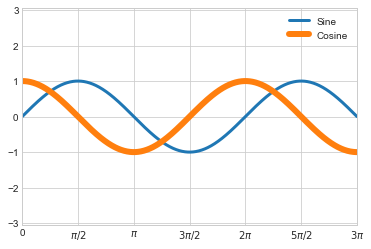

In [29]:

fig,ax=plt.subplots()
x=np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x),lw=3,label='Sine')
ax.plot(x,np.cos(x),lw=6,label='Cosine')

ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))

def format_func(value,tick_number):
    N=int(np.round(2*value/np.pi))
    if N==0:
        return "0"
    elif N==1:
        return r"$\pi/2$"
    elif N==2:
        return r"$\pi$"
    elif N%2>0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


(array([  1.,   7.,  40., 108., 224., 242., 215., 116.,  40.,   7.]),
 array([-3.67887434, -3.01671959, -2.35456484, -1.69241009, -1.03025534,
        -0.36810059,  0.29405417,  0.95620892,  1.61836367,  2.28051842,
         2.94267317]),
 <a list of 10 Patch objects>)

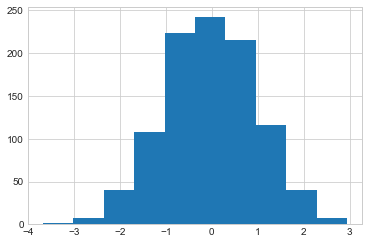

In [34]:
x=np.random.randn(1000)
plt.hist(x)
#ax=plt.axes(axisbg='#E6E6E6')

(array([  1.,   7.,  40., 108., 224., 242., 215., 116.,  40.,   7.]),
 array([-3.67887434, -3.01671959, -2.35456484, -1.69241009, -1.03025534,
        -0.36810059,  0.29405417,  0.95620892,  1.61836367,  2.28051842,
         2.94267317]),
 <a list of 10 Patch objects>)

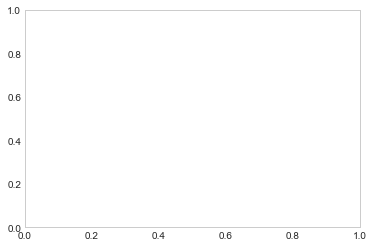

In [36]:

ax.set_axisbelow(True)

plt.grid(color='w',linestyle='solid')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors='gray',direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
ax.hist(x)

(array([  1.,   7.,  40., 108., 224., 242., 215., 116.,  40.,   7.]),
 array([-3.67887434, -3.01671959, -2.35456484, -1.69241009, -1.03025534,
        -0.36810059,  0.29405417,  0.95620892,  1.61836367,  2.28051842,
         2.94267317]),
 <a list of 10 Patch objects>)

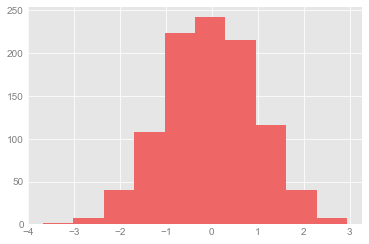

In [38]:
IPython_default=plt.rcParams.copy()
from matplotlib import cycler

colors=cycler('color',
             ['#ee6666','#3388bb','#9988dd',
              '#eecc55','#88bb44','#ffbbbb'])
plt.rc('axes',facecolor='#e6e6e6',edgecolor='none',
      axisbelow=True,grid=True,prop_cycle=colors)

plt.rc('grid',color='w',linestyle='solid')
plt.rc('xtick',direction='out',color='gray')
plt.rc('ytick',direction='out',color='gray')
plt.rc('patch',edgecolor='#e6e6e6')
plt.rc('lines',linewidth=2)

plt.hist(x)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

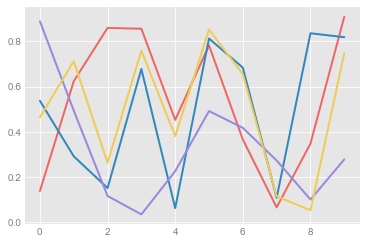

In [42]:
for i in range(4):
    plt.plot(np.random.rand(10))
plt.style.available

E:\Conda\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The datapath rcparam was deprecated in Matplotlib 3.2.1 and will be removed two minor releases later.
  self[key] = other[key]
E:\Conda\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
E:\Conda\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
E:\Conda\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
E:\Conda\lib\_collections_abc.py:832: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]


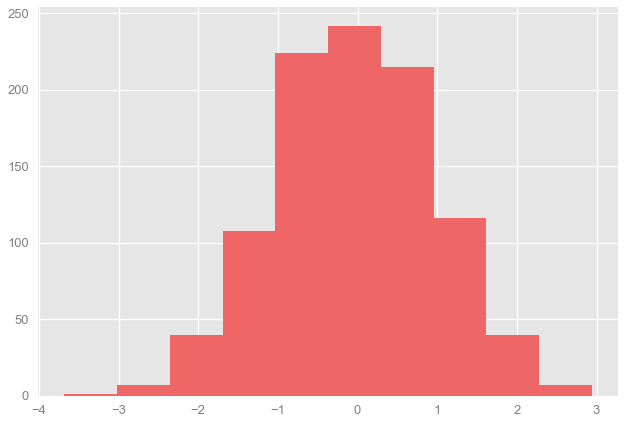

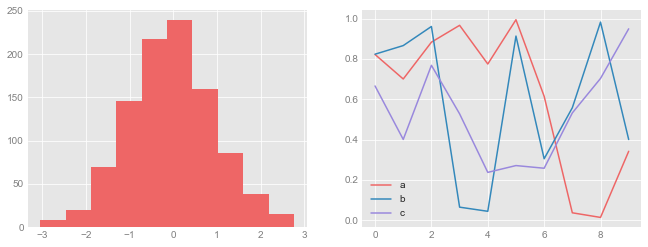

In [47]:
#context manager
with plt.style.context('seaborn-talk'):
    plt.hist(x)
    
def hist_and_lines():
    np.random.seed(0)
    fig,ax=plt.subplots(1,2,figsize=(11,4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a','b','c'],loc='lower left')

plt.rcParams.update(IPython_default)
hist_and_lines()

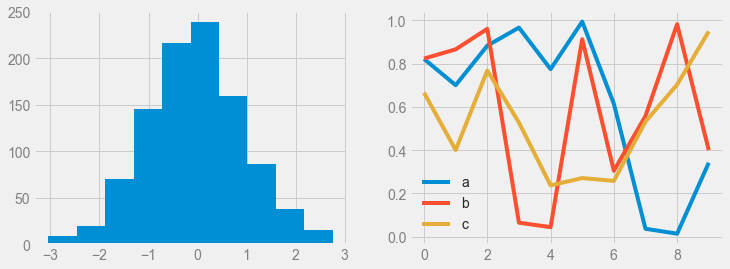

In [48]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

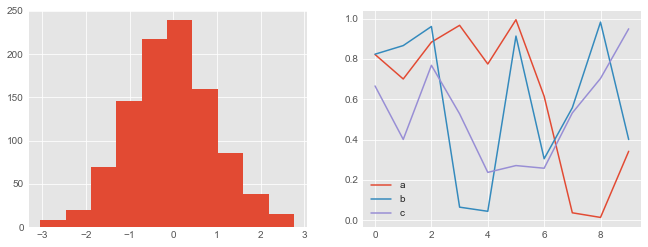

In [49]:
with plt.style.context('ggplot'):
    hist_and_lines()

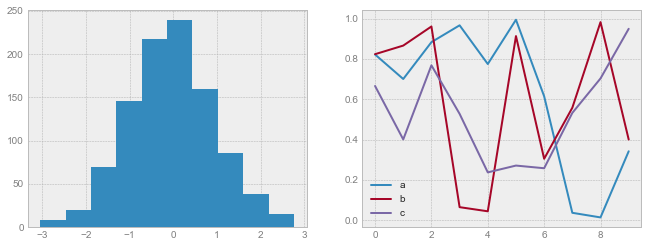

In [50]:
with plt.style.context('bmh'):
    hist_and_lines()

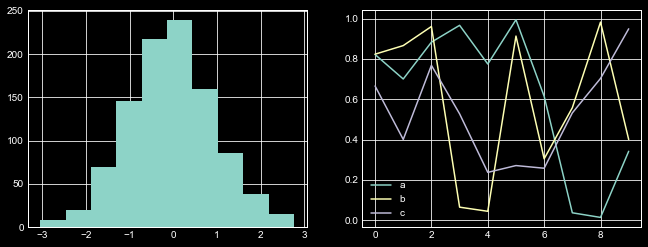

In [51]:
with plt.style.context('dark_background'):
    hist_and_lines()

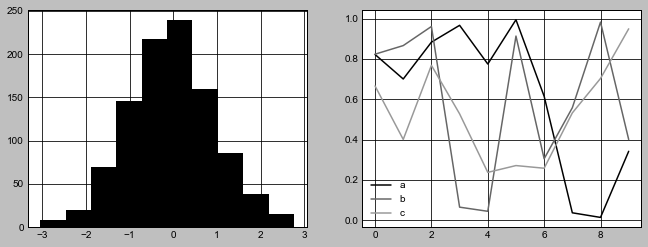

In [52]:
with plt.style.context('grayscale'):
    hist_and_lines()

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


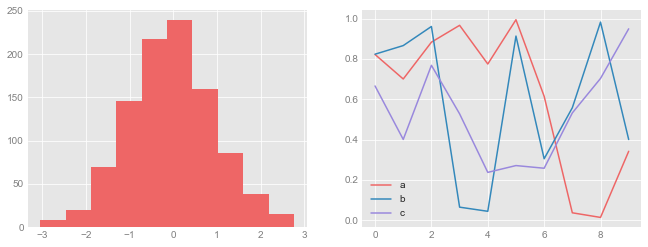

In [53]:
import seaborn

hist_and_lines()

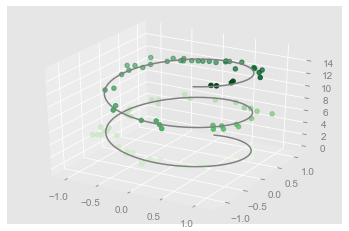

In [57]:
from mpl_toolkits import mplot3d

fig =plt.figure()
ax=plt.axes(projection='3d')

zline=np.linspace(0,15,1000)
xline=np.sin(zline)
yline=np.cos(zline)

ax.plot3D(xline,yline,zline,'gray')
zdata=15*np.random.random(100)
xdata=np.sin(zdata)+0.1*np.random.randn(100)
ydata=np.cos(zdata)+0.1*np.random.randn(100)

ax.scatter3D(xdata,ydata,zdata,c=zdata,cmap='Greens')

Text(0.5, 0, 'z')

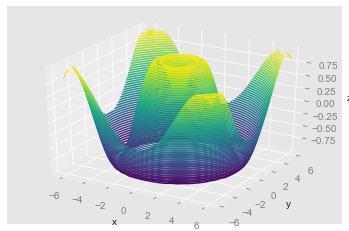

In [62]:
def f(x,y):
    return np.sin(np.sqrt(x**2+y**2))

x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


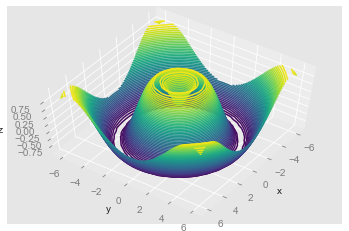

In [64]:
ax.view_init(60,35)
fig

Text(0.5, 0.92, 'wireframe')

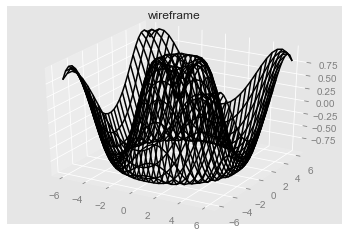

In [65]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wireframe')

Text(0.5, 0.92, 'surface')

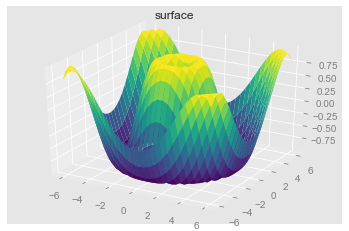

In [66]:
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,
               cmap='viridis',edgecolor='none')

ax.set_title('surface')

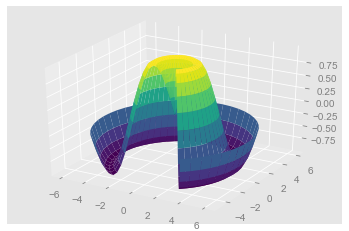

In [74]:
r=np.linspace(0,6,20)
theta=np.linspace(-0.8*np.pi,0.8*np.pi,40)
r,theta=np.meshgrid(r,theta)

X=r*np.sin(theta)
Y=r*np.cos(theta)
Z=f(X,Y)

ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')


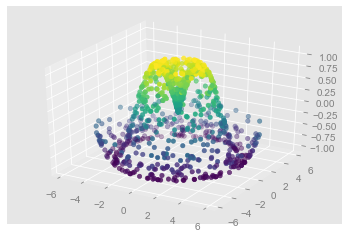

In [75]:
theta=2*np.pi*np.random.random(1000)

r=6*np.random.random(1000)
x=np.ravel(r*np.sin(theta))
y=np.ravel(r*np.cos(theta))
z=f(x,y)

ax=plt.axes(projection='3d')
ax.scatter(x,y,z,c=z,cmap='viridis',linewidth=0.5)

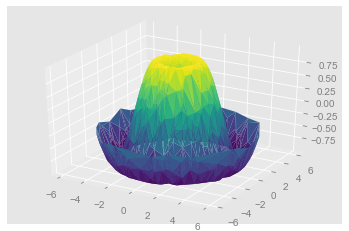

In [76]:
ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='viridis',edgecolor='none')

(-1.0, 1.0)

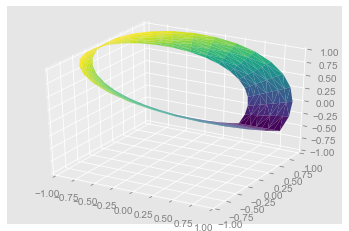

In [77]:
##moebius

theta=np.linspace(0,2*np.pi,30)
w=np.linspace(-0.25,0.25,8)
w,theta=np.meshgrid(w,theta)
phi=0.5*theta

r=1+w*np.cos(phi)

x=np.ravel(r*np.cos(theta))
y=np.ravel(r*np.sin(theta))
z=np.ravel(r*np.sin(phi))

from matplotlib.tri import Triangulation
tri=Triangulation(np.ravel(w),np.ravel(theta))

ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,triangles=tri.triangles,cmap='viridis',linewidths=0.2)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

[[ 1.59327362  0.5687224  -0.11448705  0.25163025 -1.21085564 -0.39373371]
 [ 0.08525257  0.09942199 -1.53061624  0.32762318  0.27919649 -0.37705121]
 [ 0.004175   -1.48349155 -1.47979562  0.13468726 -0.66772319 -0.01155552]
 ...
 [-1.84540722 -2.59892226  0.19822166 -0.48418025  0.20702877  0.75498708]
 [ 1.35942026  0.69607204  0.68220139 -0.01121416  1.3447604  -0.8314924 ]
 [-0.40797182 -1.33080389  0.35259862 -0.53788475  0.39344443  0.28651827]]


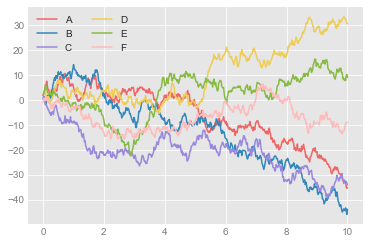

In [81]:
#seaborn
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)

plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')



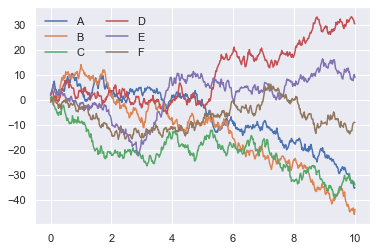

In [83]:
import seaborn as sns
sns.set()
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')


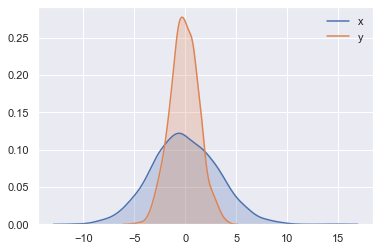

In [91]:
import pandas as pd
data=np.random.multivariate_normal([0,0],[[10,2],[2,2]],size=2000)
data=pd.DataFrame(data,columns=['x','y'])

for col in 'xy':
   # plt.hist(data[col],alpha=0.5)
    sns.kdeplot(data[col],shade=True)

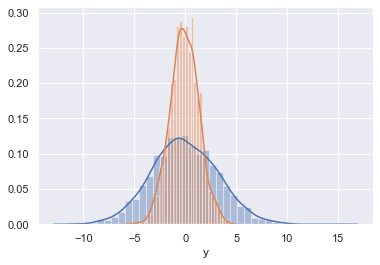

In [92]:
sns.distplot(data['x'])
sns.distplot(data['y'])


E:\Conda\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


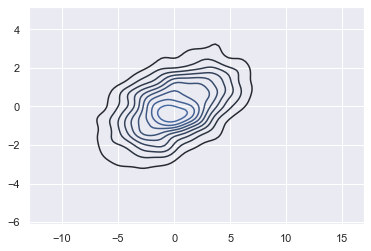

In [93]:
sns.kdeplot(data)

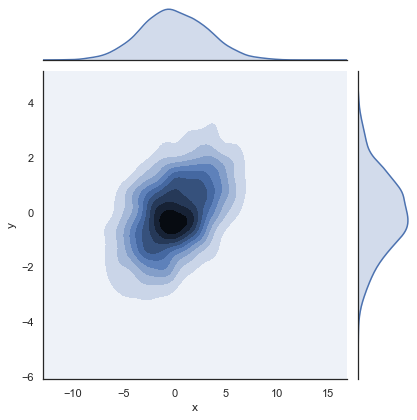

In [95]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='kde')
    

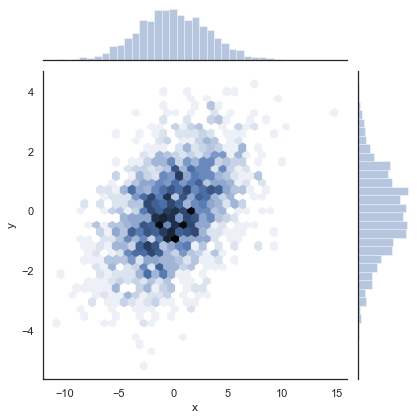

In [96]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data,kind='hex')
    

E:\Conda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


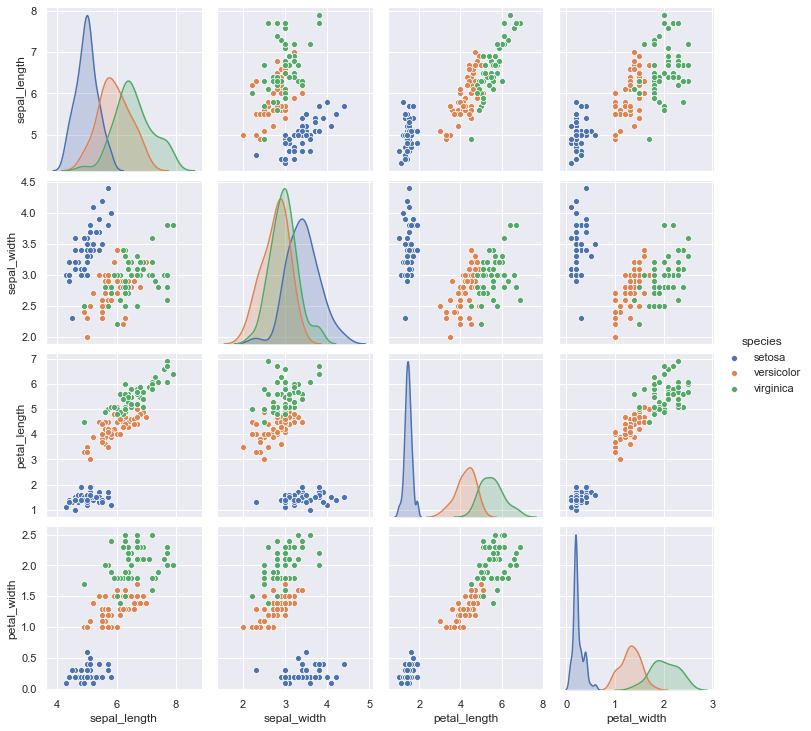

In [97]:
iris=sns.load_dataset('iris') #iris fisher
iris.head()
sns.pairplot(iris,hue='species',size=2.5)

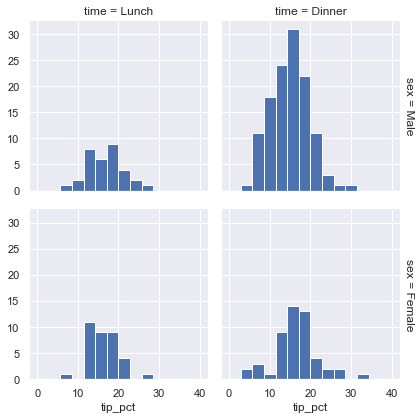

In [99]:
tips=sns.load_dataset('tips')
tips.head()
tips['tip_pct']=100*tips['tip'] /tips['total_bill']

grid=sns.FacetGrid(tips,row='sex',col='time',margin_titles=True)
grid.map(plt.hist,'tip_pct',bins=np.linspace(0,40,15))

E:\Conda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


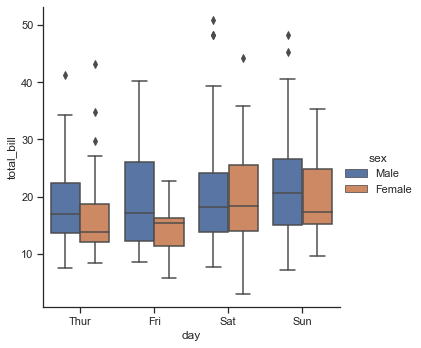

In [100]:
with sns.axes_style(style='ticks'):
    g=sns.factorplot('day','total_bill','sex',data=tips,kind='box')
    g.set_axis_labels('day','total_bill')

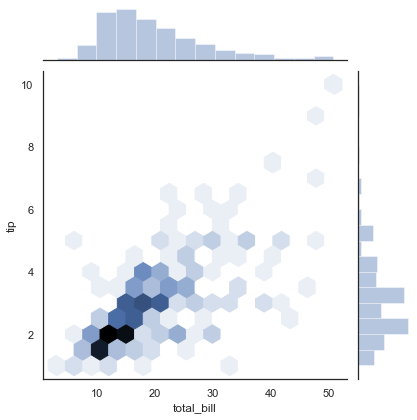

In [101]:
with sns.axes_style('white'):
    sns.jointplot('total_bill','tip',data=tips,kind='hex')


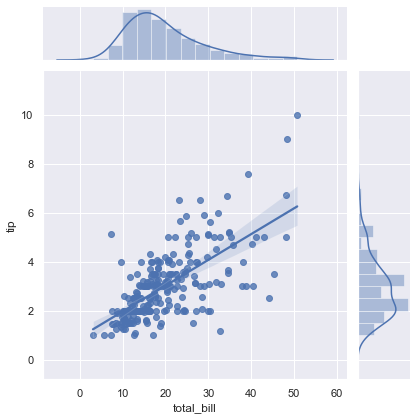

In [102]:
sns.jointplot('total_bill','tip',data=tips,kind='reg')


E:\Conda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


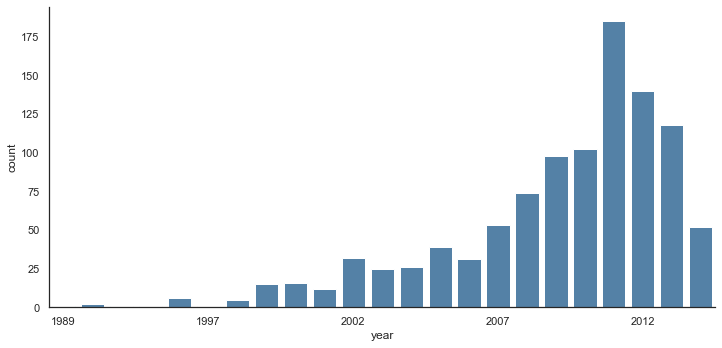

In [105]:
planets=sns.load_dataset('planets')
planets.head()
with sns.axes_style('white'):
    g= sns.factorplot('year',data=planets,aspect=2,kind='count',color='steelblue')
    g.set_xticklabels(step=5)


E:\Conda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


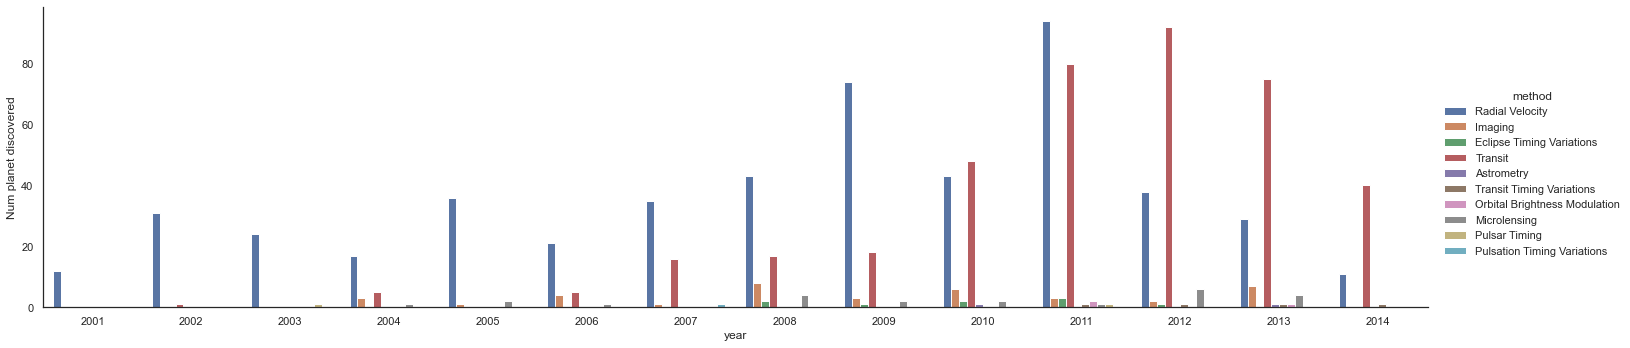

In [106]:
with sns.axes_style('white'):
    g= sns.factorplot('year',data=planets,aspect=4.0,kind='count',hue='method',order=range(2001,2015))
    g.set_ylabels('Num planet discovered')
